Домашнее задание по теме «Классификация SVM»

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

Загрузим данные

In [2]:
train_df=pd.read_csv('train_dataset.csv')

In [15]:
pd.options.display.float_format = '{:,.2f}'.format
train_df.head()

,Unnamed: 0,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,35,170,85,97.00,0.90,0.90,1,1,118,...,70,142,19.80,1,1.00,61,115,125,1,1
1,1,20,175,110,110.00,0.70,0.90,1,1,119,...,71,114,15.90,1,1.10,19,25,30,1,0
2,2,45,155,65,86.00,0.90,0.90,1,1,110,...,57,112,13.70,3,0.60,1090,1400,276,0,0
3,3,45,165,80,94.00,0.80,0.70,1,1,158,...,46,91,16.90,1,0.90,32,36,36,0,0
4,4,20,165,60,81.00,1.50,0.10,1,1,109,...,47,92,14.90,1,1.20,26,28,15,0,0


In [4]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

В датасете нет пропусков. 

Уменьшим вес датасета.

In [5]:
int_cols = train_df.select_dtypes('int').columns

float_cols = train_df.select_dtypes('float').columns
for col in int_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='integer')
for col in float_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='float')

In [6]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int8   
 1   height(cm)           38984 non-null  int16  
 2   weight(kg)           38984 non-null  int16  
 3   waist(cm)            38984 non-null  float32
 4   eyesight(left)       38984 non-null  float32
 5   eyesight(right)      38984 non-null  float32
 6   hearing(left)        38984 non-null  int8   
 7   hearing(right)       38984 non-null  int8   
 8   systolic             38984 non-null  int16  
 9   relaxation           38984 non-null  int16  
 10  fasting blood sugar  38984 non-null  int16  
 11  Cholesterol          38984 non-null  int16  
 12  triglyceride         38984 non-null  int16  
 13  HDL                  38984 non-null  int16  
 14  LDL                  38984 non-null  int16  
 15  hemoglobin           38984 non-null 

# EDA

In [7]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
age,0.00
height(cm),0.00
weight(kg),0.00
waist(cm),0.00
eyesight(left),0.00
eyesight(right),0.00
hearing(left),0.00
hearing(right),0.00
systolic,0.00
relaxation,0.00


In [8]:
#Находим максимальные и минимальные значения
min_max_df = pd.DataFrame({'Максимальное значение': train_df.max(), 'Минимальное значение': train_df.min()})

min_max_df

,Максимальное значение,Минимальное значение
age,85.00,20.00
height(cm),190.00,130.00
weight(kg),135.00,30.00
waist(cm),129.00,51.00
eyesight(left),9.90,0.10
eyesight(right),9.90,0.10
hearing(left),2.00,1.00
hearing(right),2.00,1.00
systolic,233.00,71.00
relaxation,146.00,40.00


In [9]:
#Находим средние значения
mean_df = pd.DataFrame({'Среднее значение': train_df.mean()})

mean_df

,Среднее значение
age,44.13
height(cm),164.69
weight(kg),65.94
waist(cm),82.06
eyesight(left),1.01
eyesight(right),1.01
hearing(left),1.03
hearing(right),1.03
systolic,121.48
relaxation,75.99


In [10]:
#Находим медиану
median_df = pd.DataFrame({'Медиана': train_df.median()})

median_df

,Медиана
age,40.00
height(cm),165.00
weight(kg),65.00
waist(cm),82.00
eyesight(left),1.00
eyesight(right),1.00
hearing(left),1.00
hearing(right),1.00
systolic,120.00
relaxation,76.00


In [11]:
#Находим дисперсию
var_df = pd.DataFrame({'Диспрерсия': train_df.var()})

var_df

,Диспрерсия
age,145.53
height(cm),84.41
weight(kg),166.32
waist(cm),86.99
eyesight(left),0.25
eyesight(right),0.24
hearing(left),0.02
hearing(right),0.03
systolic,186.15
relaxation,93.29


In [12]:
#Находим квантиль 0.1 и 0.9
quantile_df = pd.DataFrame({'Квантиль 0.1': train_df.quantile(0.1), 'Квантиль 0.9': train_df.quantile(0.9)})

quantile_df

,Квантиль 0.1,Квантиль 0.9
age,30.00,60.00
height(cm),150.00,175.00
weight(kg),50.00,85.00
waist(cm),70.00,94.00
eyesight(left),0.60,1.50
eyesight(right),0.60,1.50
hearing(left),1.00,1.00
hearing(right),1.00,1.00
systolic,104.00,138.00
relaxation,64.00,88.00


In [13]:
#Находим квартиль 1 и 3
quartile_df = pd.DataFrame({'Квартиль 1': train_df.quantile(0.25), 'Квартиль 3': train_df.quantile(0.75)})

quartile_df

,Квартиль 1,Квартиль 3
age,40.00,55.00
height(cm),160.00,170.00
weight(kg),55.00,75.00
waist(cm),76.00,88.00
eyesight(left),0.80,1.20
eyesight(right),0.80,1.20
hearing(left),1.00,1.00
hearing(right),1.00,1.00
systolic,112.00,130.00
relaxation,70.00,82.00


# 3) Доля 1
Столбец “smoking” принимает значения 0 или 1, в зависимости от статуса курения, и является целевой переменной. Для целевой переменной smoking посчитайте долю 1.

In [34]:
print(f"Доля значения 1 для целевой переменной smoking: {(train_df.smoking.values == 1).mean()}")

Доля значения 1 для целевой переменной smoking: 0.3672788836445721


# 4) Графики 
Постройте минимум 2 информативных графика, которые будут полезны для анализа

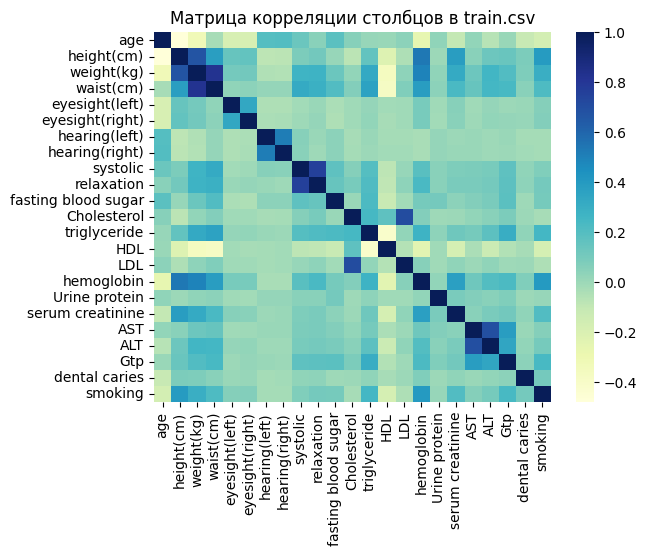

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train_df.corr(), cmap="YlGnBu")
plt.title("Матрица корреляции столбцов в train.csv")
plt.show()

Есть корреляция между некоторыми переменными, но она ожидаемая (рост и вес). Нет необходимости убирать какой-либо из столбцов.

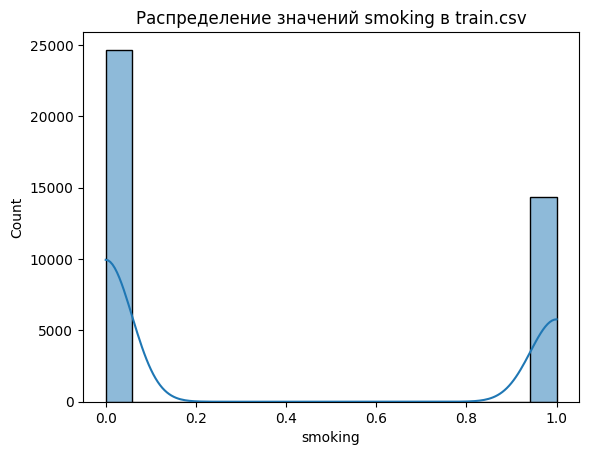

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_df['smoking'], kde=True)
plt.title("Распределение значений smoking в train.csv")
plt.show()

Из распределения видно, что больше некурящих.

# Обучение алгоритма SVM

In [3]:
X = train_df.drop('smoking', axis=1)
Y = train_df['smoking']

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer().fit(X)
df_pt = pt.transform(X)
X_train, X_test, y_train, y_test = train_test_split(df_pt, Y, train_size=0.3, random_state = 42)

Функция для оценки качества алгоритма

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание вероятностей на обучающей и тестовой выборке
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Расчет AUC-ROC
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC Train: {roc_auc_train:.2f}")
    print(f"ROC-AUC Test: {roc_auc_test:.2f}")

    # Построение ROC-кривой
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC Curve Train')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC Curve Test')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({type(model).__name__})')
    plt.legend()
    plt.show()

    # Поиск порога, максимизирующего F1-score
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = [f1_score(y_test, y_test_proba >= t) for t in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold: {optimal_threshold:.2f}")

    # Пересчет метрик с учетом оптимального порога
    y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
    y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

    train_precision = precision_score(y_train, y_train_pred_optimal)
    train_accuracy = accuracy_score(y_train, y_train_pred_optimal)
    train_recall = recall_score(y_train, y_train_pred_optimal)
    test_precision = precision_score(y_test, y_test_pred_optimal)
    test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
    test_recall = recall_score(y_test, y_test_pred_optimal)

    print(f"Optimal Training Precision: {train_precision:.2f}")
    print(f"Optimal Training Аccuracy: {train_accuracy:.2f}")
    print(f"Optimal Training Recall: {train_recall:.2f}")
    print(f"Optimal Test Precision: {test_precision:.2f}")
    print(f"Optimal Test Аccuracy: {test_accuracy:.2f}")
    print(f"Optimal Test Recall: {test_recall:.2f}")

    metrics = {
        'params': [
            'Training_Precision', 'Test_Precision',
            'Training_Аccuracy','Test_Аccuracy',
            'Training_Recall', 'Test_Recall',
            'ROC_AUC_Train', 'ROC_AUC_Test'
        ],
        'values': [
            train_precision, test_precision,
            train_accuracy, test_accuracy,
            train_recall, test_recall,
            roc_auc_train, roc_auc_test
        ]
    }

    return metrics

Чтобы выбрать C и ядро алгоритма воспользуемся RandomizedSearchCV. Узнаем лучшие параметры и тренируем с ними алгоритм.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Определяем сетку параметров для C и ядер, которые мы хотим проверить
param_grid = [{'kernel':['linear'], 'C': np.linspace(0.001, 10, num=100)},
    {'kernel':['poly'], 'degree':[2, 3], 'C':np.linspace(0.001, 10, num=100)},
    {'kernel':['sigmoid'], 'C':np.linspace(0.001, 10, num=100)},
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5, 10], 'C':np.linspace(0.001, 10, num=100)
              }]

svm_model = SVC()

# Создаем объект RandomizedSearchCV с моделью логистической регрессии и сеткой параметров
grid_search = RandomizedSearchCV(svm_model, param_grid, n_iter=20, scoring='f1')

# Обучаем модель на данных с использованием кросс-валидации
grid_search.fit(X_train, y_train)

# Получаем лучшее значение параметра C и ядра, найденное в процессе кросс-валидации
print('Лучшее значение параметра:', grid_search.best_params_, " Оценка: ", grid_search.best_score_)

Лучшее значение параметра: {'kernel': 'rbf', 'gamma': 'auto', 'C': np.float64(2.6270000000000002)}  Оценка:  0.6474144816000184


In [7]:
# Создаем модель с лучшим значением C и ядра
best_svm_model = SVC(**grid_search.best_params_, probability=True)

Оцениваем качество алгоритма.

ROC-AUC Train: 0.90
ROC-AUC Test: 0.82


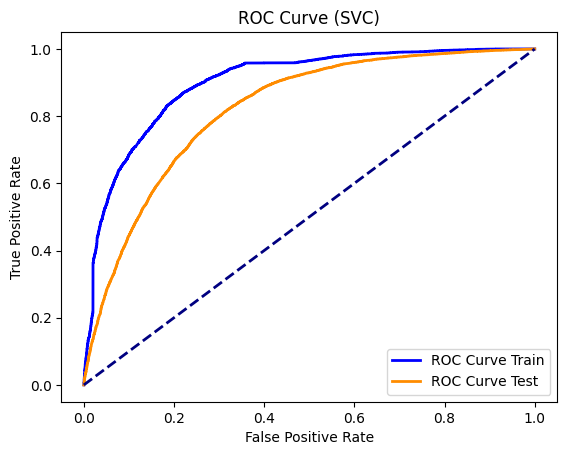

Optimal Threshold: 0.31
Optimal Training Precision: 0.68
Optimal Training Аccuracy: 0.81
Optimal Training Recall: 0.88
Optimal Test Precision: 0.60
Optimal Test Аccuracy: 0.73
Optimal Test Recall: 0.82


In [8]:
metrics_svm  = calculate_metrics_and_plot_roc(best_svm_model, X_train, y_train, X_test, y_test)

Алгоритм правильно предсказывает целевую переменую в 73% случаев. Это означает, что данный алгоритм довольно хорошего качества.